# Analyzing fMRI data with Nilearn


# Installations

In [ ]:
!pip install nilearn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 37.2 MB/s eta 0:00:00


# 1. Transform fMRI image to voxel-level timeseries signals
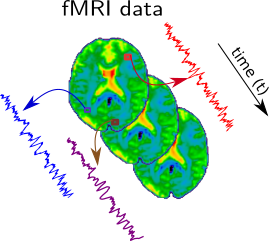

## 1.1. Grab resting-state fMRI data

In [ ]:
from nilearn import datasets

adhd_dataset = datasets.fetch_adhd(n_subjects=1)


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/adhd



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/fbef5baff0b388a8c913a08e1d84e059/adhd40_metadata.tgz..... done.


Downloaded 26984448 of 44414948 bytes (60.8%,    0.6s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/e7ff5670bd594dcd9453e57b55d69dc9/adhd40_0010042.tgz..... done.


In [ ]:
print(adhd_dataset.keys())

dict_keys(['func', 'confounds', 'phenotypic', 'description'])


In [ ]:
functional = adhd_dataset['func']

In [ ]:
print(functional)

['/root/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz']


## 1.2. Load functional image with [nilearn.image.load_img](https://nilearn.github.io/stable/modules/generated/nilearn.image.load_img.html)

In [ ]:
from nilearn import image

func_img = image.load_img(functional[0])
print(func_img.shape)

(61, 73, 61, 176)


This means that there are 176 volumes, each with a 3D structure of (61, 73, 61).



## 1.3. Viewing the functional image with [nilearn.plotting.plot_epi](https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_epi.html)

### 1.3.1 First subset the image

In [ ]:
mean_img = image.mean_img(functional[0])
print(mean_img.shape)

(61, 73, 61)


### 1.3.2 Viewing the mean image

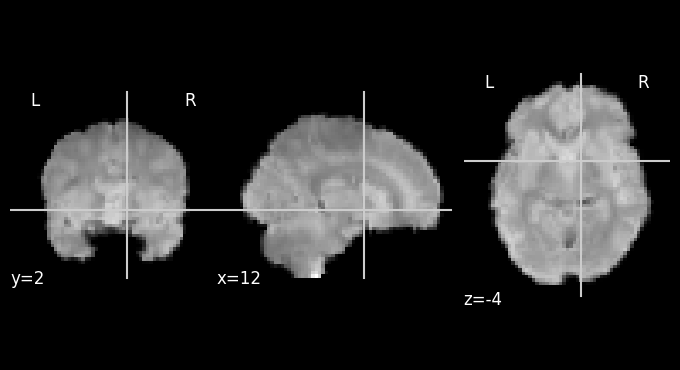

In [ ]:
from nilearn import plotting

plotting.plot_epi(mean_img, cmap='gray')

## 1.4. Transform fMRI image to timeseries signals

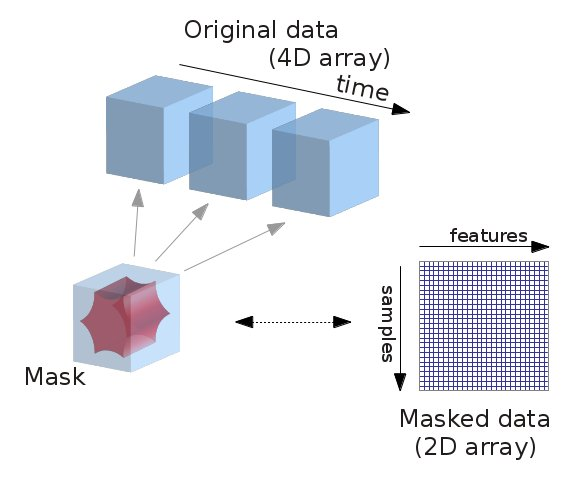

### 1.4.1 Prepare a mask with [nilearn.masking.compute_brain_mask](https://nilearn.github.io/stable/modules/generated/nilearn.masking.compute_epi_mask.html#nilearn.masking.compute_epi_mask)

In [ ]:
from nilearn import masking

mask_img = masking.compute_brain_mask(func_img, threshold=0.2)

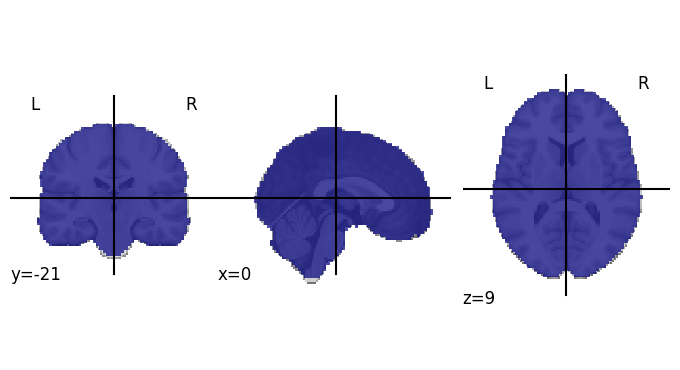

In [ ]:
plotting.plot_roi(mask_img)

### 1.4.2. Transforming fMRI image to signals [nilearn.maskers.NiftiMasker](https://nilearn.github.io/stable/modules/generated/nilearn.maskers.NiftiMasker.html)

In [ ]:
from nilearn.maskers import NiftiMasker

nifti_masker = NiftiMasker(mask_img=mask_img)
time_series = nifti_masker.fit_transform(func_img)
print(time_series.shape)

(176, 69464)


In [ ]:
mask_img.get_fdata().sum()

69464.0

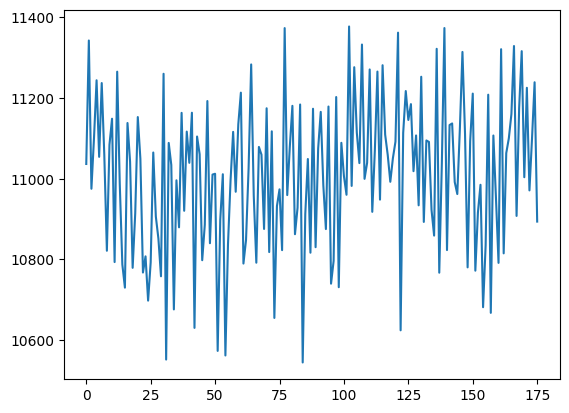

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time_series[:, 100])

# 2.  Transform fMRI image to a ROI-level timeseries signals
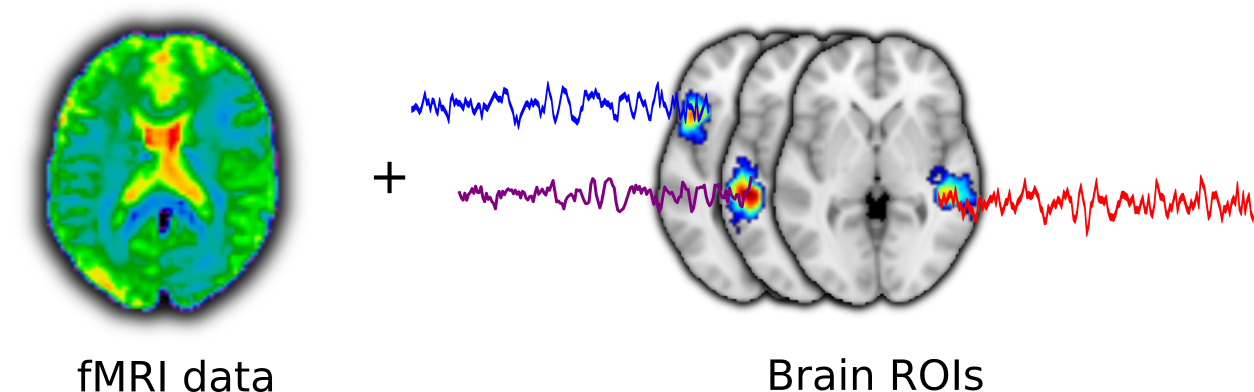

## 2.1. Choosing ROIs i.e., Grab the AAL atlas with [nilearn.datasets.fetch_atlas_aal](https://nilearn.github.io/stable/modules/generated/nilearn.datasets.fetch_atlas_aal.html)

In [ ]:
from nilearn import datasets

aal_atlas = datasets.fetch_atlas_aal()


Dataset created in /root/nilearn_data/aal_SPM12



 ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/aal_SPM12/a4f2a6316ec7f29f771edef840308edf/aal_for_SPM12.tar.gz..... done.


In [ ]:
print(aal_atlas.keys())

dict_keys(['description', 'maps', 'labels', 'indices'])


In [ ]:
print(len(aal_atlas['labels']))

116


## 2.1.1. View the atlas

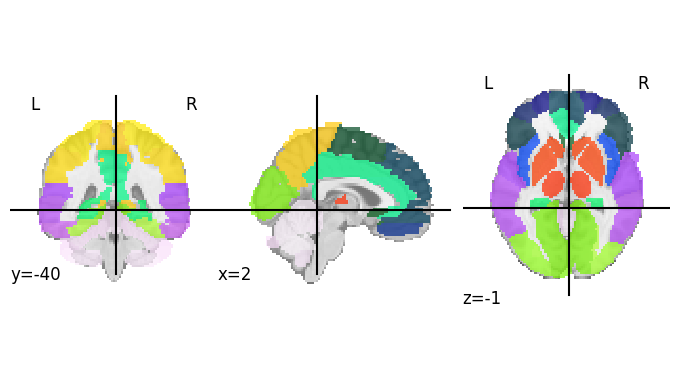

In [ ]:
from nilearn import plotting

plotting.plot_roi(aal_atlas.maps)

## 2.2. Transform fMRI image to ROI-level timeseries signals with [nilearn.maskers.NiftiLabelsMasker](https://nilearn.github.io/stable/modules/generated/nilearn.maskers.NiftiLabelsMasker.html)

In [ ]:
from nilearn.maskers import NiftiLabelsMasker

labels_masker =  NiftiLabelsMasker(labels_img=aal_atlas.maps)

time_series_each_ROI = labels_masker.fit_transform(func_img)

In [ ]:
print(time_series_each_ROI.shape)

(176, 116)


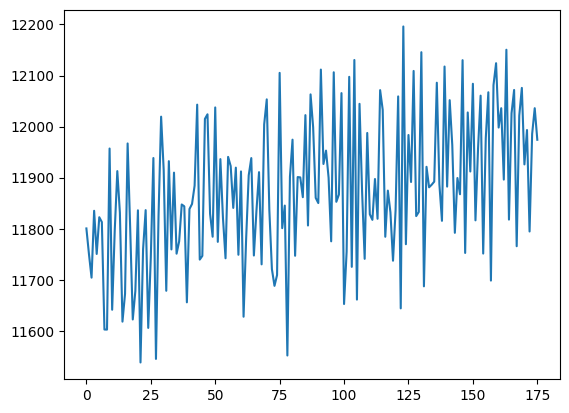

In [ ]:
plt.plot(time_series_each_ROI[:, 115])

# 3. Transform fMRI image to seed-level timeseries signals
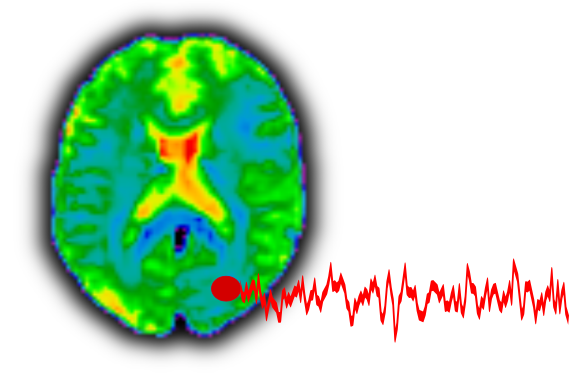

## 3.1. Decide seed region i.e., Posterior Cingulate Cortex (0, -53, 26)

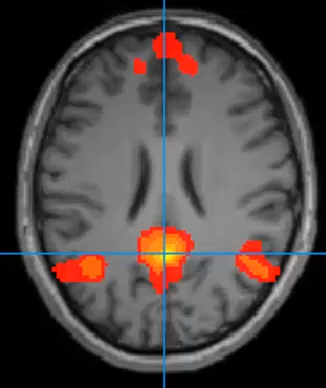

### 3.1.1. View the seed region


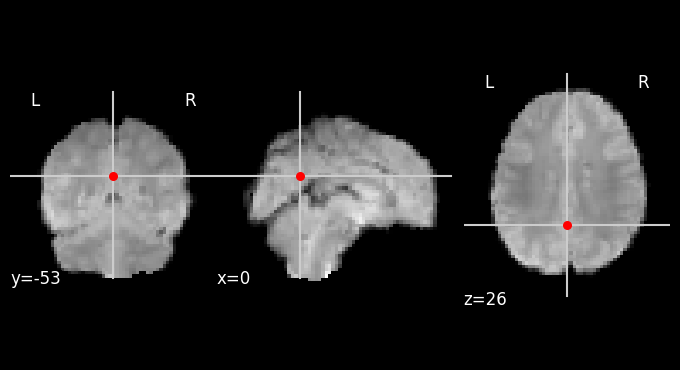

In [ ]:
from nilearn import plotting

seed = [(0, -53, 26)]

display = plotting.plot_epi(mean_img, cmap='gray', cut_coords=seed[0])
display.add_markers(seed, marker_size=30)

## 3.2. Transform fMRI image to seed-level timeseries signals with [nilearn.maskers.NiftiSpheresMasker](https://nilearn.github.io/stable/modules/generated/nilearn.maskers.NiftiSpheresMasker.html)

In [ ]:
from nilearn.maskers import NiftiSpheresMasker

spheres_masker = NiftiSpheresMasker(seeds=seed, radius=6.0)

time_series_seed = spheres_masker.fit_transform(func_img)

print(time_series_seed.shape)

(176, 1)


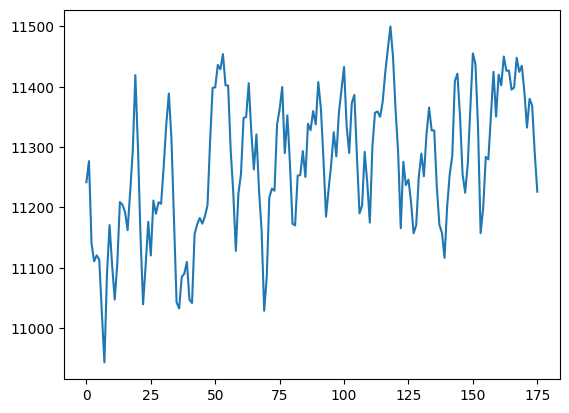

In [ ]:
plt.plot(time_series_seed)

## 3.2.1. Two seeds PCC and Medial prefrontal cortex

In [ ]:
seeds = [(0, -53, 26), (1, 50, -5)]

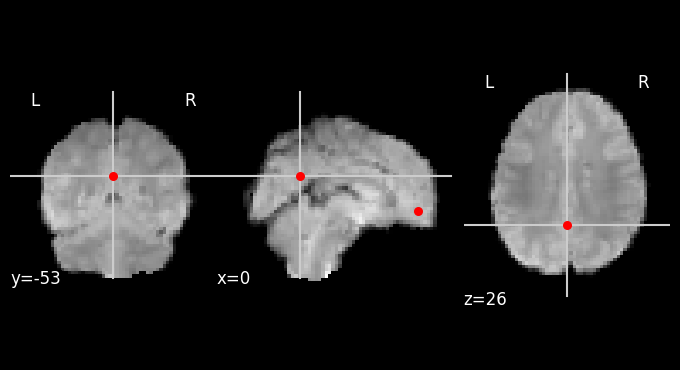

In [ ]:
display = plotting.plot_epi(mean_img, cmap='gray', cut_coords=seed[0])
display.add_markers(seeds, marker_size=30)

In [ ]:
spheres_masker = NiftiSpheresMasker(seeds=seeds, radius=6.0)
time_series_two_seeds = spheres_masker.fit_transform(func_img)

print(time_series_two_seeds.shape)

(176, 2)


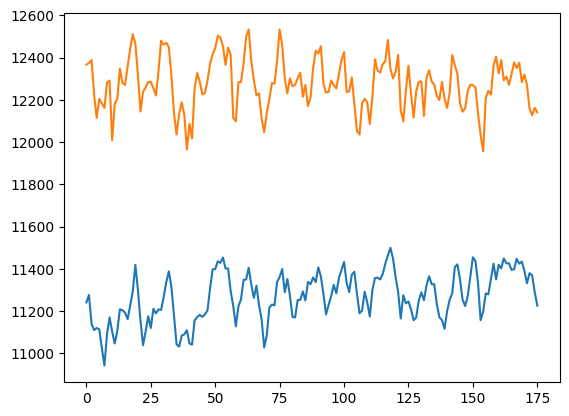

In [ ]:
plt.plot(time_series_two_seeds)

# What next ?

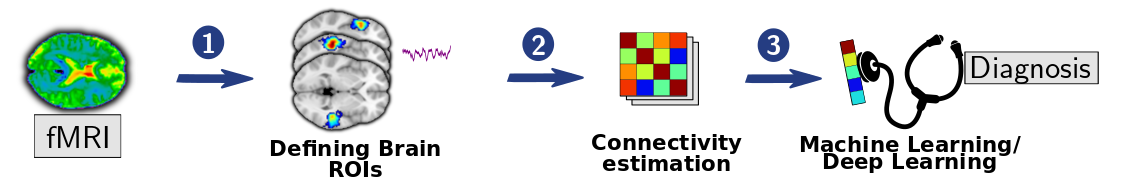